In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel('datos-ciberdelitos2022.xlsx')

In [3]:
df.head()

,edad,sexo,nivel_estudio,ocupacion,p01,p02_1,p02_2,p02_3,p02_4,p03_1,...,p21_1,p21_2,p21_3,p21_4,p21_5,p21_6,p21_7,p21_8,p21_9,Columna1
0,55,M,Secundario,Comerciante,2. Dos o tres veces a la semana,1. Cuando estoy en mi casa,NaN,NaN,NaN,NaN,...,1. Contactar a la policía/fiscalía,2. Contactar al sitio web/ proveedor,NaN,4. Contactar al proveedor de internet,5. Contactar a un organismo de defensa del con...,6. Contactar al banco,NaN,NaN,NaN,NaN
1,32,F,Secundario,Empleado,1. Diariamente,1. Cuando estoy en mi casa,2. En mi lugar de trabajo,3. En cualquier lugar con mis datos móviles,NaN,1. Smartphone,...,NaN,NaN,3. Reportar la situación al sitio o al mail de...,NaN,NaN,6. Contactar al banco,NaN,NaN,NaN,NaN
2,42,F,Terciario/Universitario,Ama de casa,1. Diariamente,NaN,NaN,3. En cualquier lugar con mis datos móviles,NaN,1. Smartphone,...,1. Contactar a la policía/fiscalía,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29,M,Secundario,Comerciante,1. Diariamente,1. Cuando estoy en mi casa,NaN,NaN,NaN,1. Smartphone,...,1. Contactar a la policía/fiscalía,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,22,M,Secundario,Empleado,1. Diariamente,1. Cuando estoy en mi casa,2. En mi lugar de trabajo,3. En cualquier lugar con mis datos móviles,NaN,1. Smartphone,...,NaN,NaN,NaN,NaN,NaN,6. Contactar al banco,7. Contactar al proveedor de tarjeta de crédit...,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Columns: 120 entries, edad to Columna1
dtypes: float64(1), int64(1), object(118)
memory usage: 471.7+ KB


In [5]:
df['edad'].mean()

48.12326043737575

C:\Users\RTECH\AppData\Local\Temp\ipykernel_11432\494399083.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


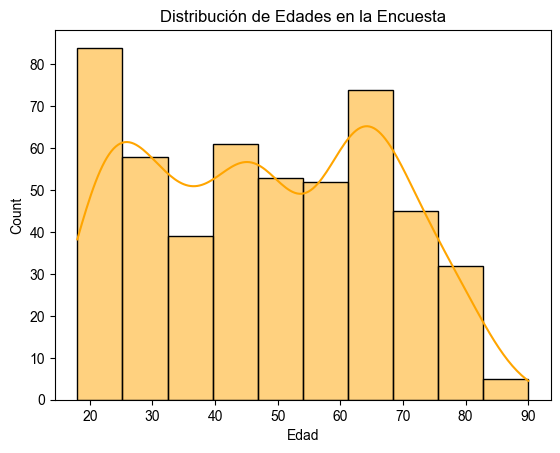

In [6]:
sns.histplot(df['edad'], bins=10, kde=True, color='orange')
plt.style.use('seaborn')
plt.xlabel('Edad')
plt.title('Distribución de Edades en la Encuesta')
plt.show()

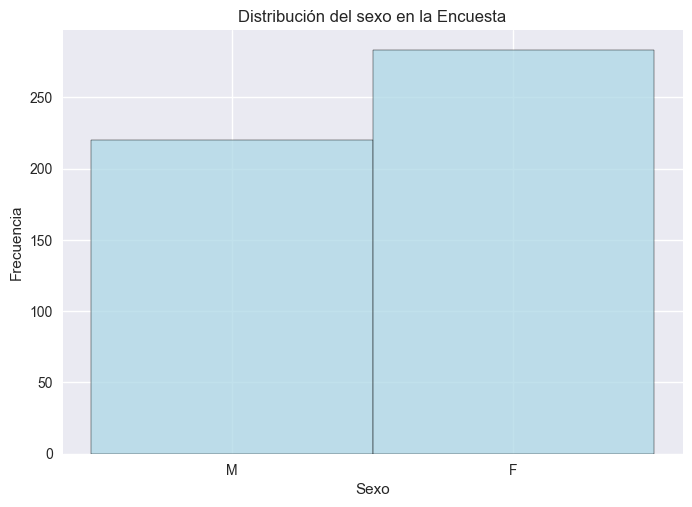

In [7]:
sns.histplot(df['sexo'], bins=2, kde=False, color='lightblue')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.title('Distribución del sexo en la Encuesta')
plt.show()

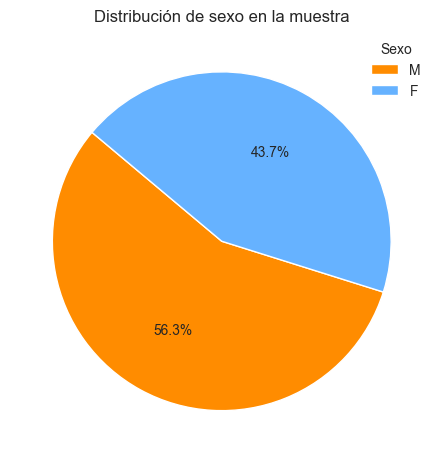

In [8]:
colores = ['#FF8C00','#66B2FF']

plt.pie(df['sexo'].value_counts(), startangle=140, autopct='%1.1f%%',colors=colores, wedgeprops = {"linewidth": 1, "edgecolor": "white"})
plt.title('Distribución de sexo en la muestra')
plt.legend(['M', 'F'], title="Sexo", loc="best")
plt.show()


In [9]:
df['nivel_estudio'].value_counts()

nivel_estudio
Terciario/Universitario    289
Secundario                 179
Primario                    33
Sin estudios                 2
Name: count, dtype: int64

In [10]:
df['ocupacion'].value_counts()

ocupacion
Empleado                                   108
Jubilado                                    85
Profesional                                 49
Estudiante                                  39
Docente                                     36
Independiente                               33
EmpleadoEstudiante                          32
Comerciante                                 23
Ama de casa                                 20
IndependienteProfesional                     9
DocenteJubilado                              7
EstudianteIndependiente                      7
EmpleadoIndependiente                        6
ProfesionalJubilado                          5
EmpleadoJubilado                             5
DocenteProfesional                           5
IndependienteComerciante                     4
EmpleadoDocente                              4
EmpleadoProfesional                          3
IndependienteJubilado                        3
DocenteEstudiante                            2
Com

Es poco eficiente analizar esto, lo voy a intentar cambiar un poco para el analisis

In [11]:
import random

In [12]:
ocupaciones_simples = ['Empleado', 'Jubilado', 'Profesional', 'Estudiante', 'Docente', 'Independiente', 'Comerciante', 'Ama de casa', 'EmpleadoEstudiante']
ocupaciones_varias = []

for dato in df['ocupacion']:
    if dato not in ocupaciones_simples:
        ocupaciones_varias.append(dato)

df['ocupacion'] = df['ocupacion'].replace(ocupaciones_varias, 'Otros')

df['random'] = [random.randrange(0,7) for _ in range(len(df))]
def custom_replace(row):
    if row['ocupacion'] == 'EmpleadoEstudiante':
        if row['random'] >= 3:
            return 'Empleado'
        else:
            return 'Estudiante'
    else:
        return row['ocupacion']
df['ocupacion'] = df.apply(custom_replace, axis=1)

df = df.drop('random', axis=1)

In [13]:
df['ocupacion'].value_counts()

ocupacion
Empleado         129
Jubilado          85
Otros             78
Estudiante        50
Profesional       49
Docente           36
Independiente     33
Comerciante       23
Ama de casa       20
Name: count, dtype: int64

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\RTECH\AppData\Local\Temp\ipykernel_11432\3897172721.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


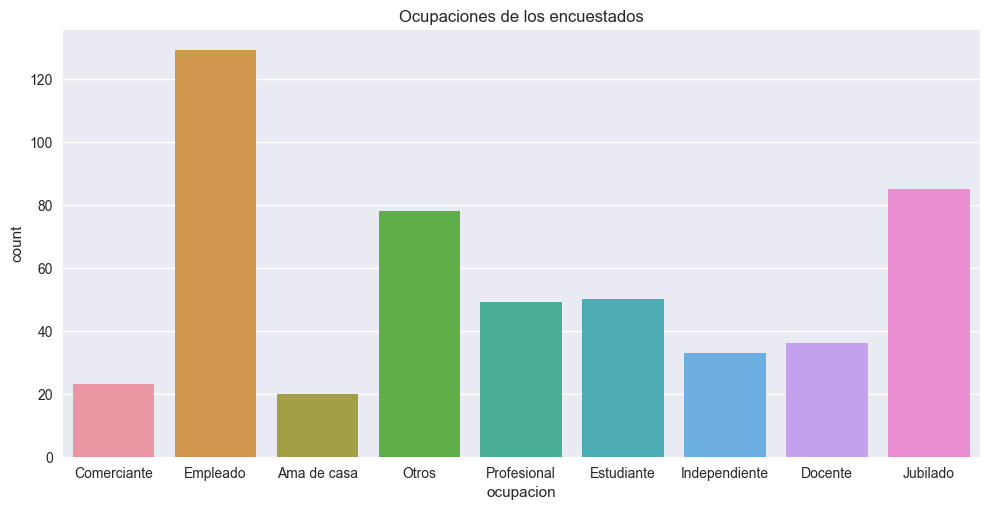

In [14]:
sns.catplot(data=df, x='ocupacion', kind='count', aspect=2)
plt.style.use('seaborn')
plt.title('Ocupaciones de los encuestados')
plt.show()

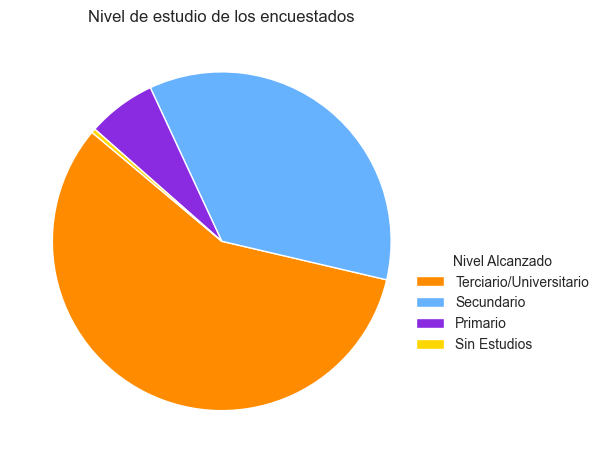

In [15]:
colores_4 = ['#FF8C00', '#66B2FF', '#8A2BE2', '#FFD700']

plt.pie(df['nivel_estudio'].value_counts(), startangle=140, colors=colores_4, wedgeprops = {"linewidth": 1, "edgecolor": "white"})
plt.title('Nivel de estudio de los encuestados')
plt.legend(['Terciario/Universitario', 'Secundario', 'Primario', 'Sin Estudios'], title="Nivel Alcanzado", loc="best", bbox_to_anchor=(0.93, 0.5))
plt.show()

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


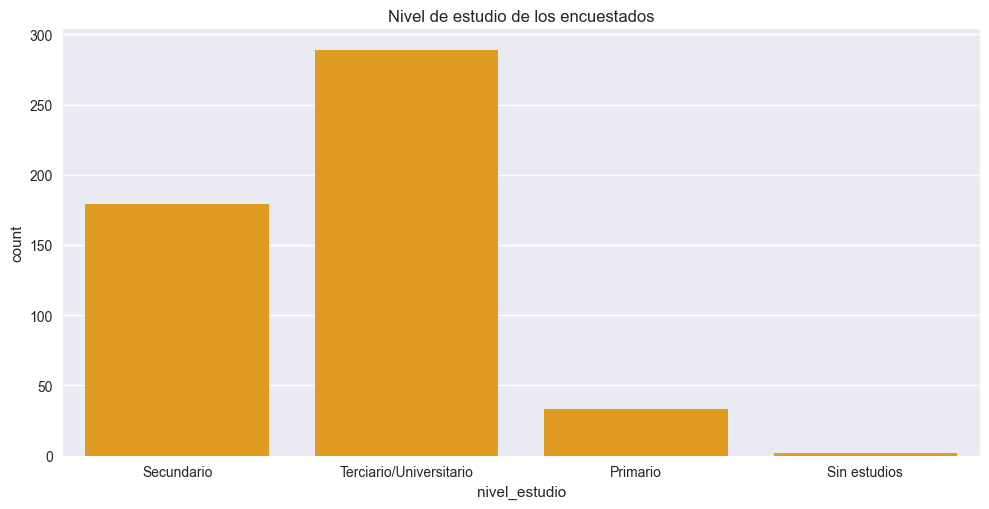

In [16]:
sns.catplot(data=df, x='nivel_estudio', kind='count', aspect=2, color='#FFA500')
plt.title('Nivel de estudio de los encuestados')
plt.show()

Se finalizó con el análisis acerca de la información de las personas encuestadas, se proseguirá con el análisis de la encuesta como tal

In [17]:
columnas_p02 = df.filter(like='p02_')
resumen_p02 = columnas_p02.apply(lambda x: x.value_counts()).T.fillna(0)

In [18]:
resumen_p02

,1. Cuando estoy en mi casa,2. En mi lugar de trabajo,3. En cualquier lugar con mis datos móviles,4. En cualquier lugar con conexión wifi pública
p02_1,435.0,0.0,0.0,0.0
p02_2,0.0,191.0,0.0,0.0
p02_3,0.0,0.0,348.0,0.0
p02_4,0.0,0.0,0.0,135.0


In [19]:
resumen_p02['Total'] = resumen_p02.sum(axis=1)

In [20]:
resumen_p02

,1. Cuando estoy en mi casa,2. En mi lugar de trabajo,3. En cualquier lugar con mis datos móviles,4. En cualquier lugar con conexión wifi pública,Total
p02_1,435.0,0.0,0.0,0.0,435.0
p02_2,0.0,191.0,0.0,0.0,191.0
p02_3,0.0,0.0,348.0,0.0,348.0
p02_4,0.0,0.0,0.0,135.0,135.0


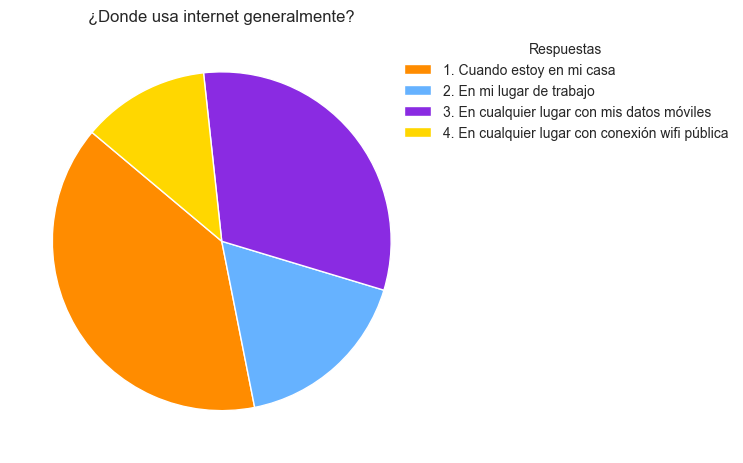

In [21]:
plt.pie(x=resumen_p02['Total'], startangle=140, colors=colores_4, wedgeprops = {"linewidth": 1, "edgecolor": "white"})
plt.title('¿Donde usa internet generalmente?')
plt.legend(resumen_p02.columns[0:4], title="Respuestas", loc="best", bbox_to_anchor=(0.90, 1))
plt.show()

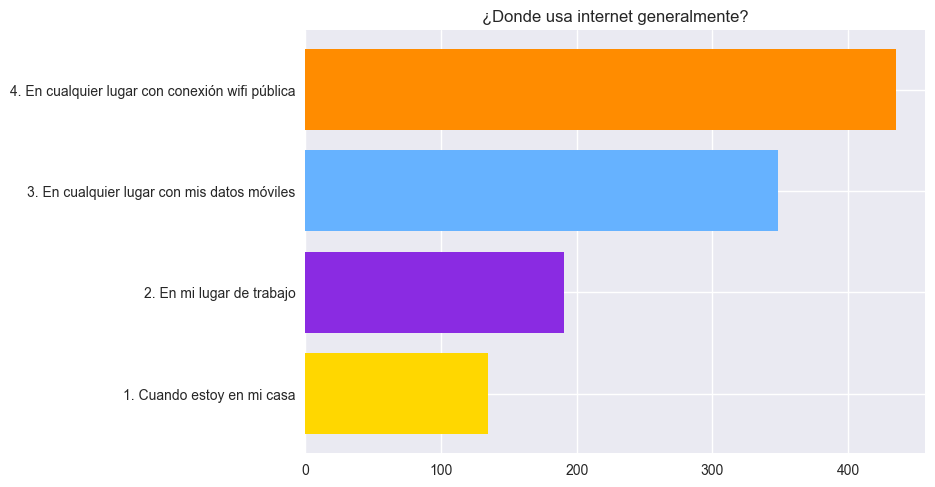

In [22]:
resumen_p02_bar = resumen_p02.sort_values(by='Total', ascending=True)

plt.barh(y= resumen_p02_bar.columns[0:4], width=resumen_p02_bar['Total'], color=colores_4[::-1])
plt.title('¿Donde usa internet generalmente?')
plt.show()

In [25]:
df['p08']

0      3. Algo informado
1      4. Bien informado
2      3. Algo informado
3      2. Poco informado
4      4. Bien informado
             ...        
498    2. Poco informado
499    3. Algo informado
500    3. Algo informado
501    4. Bien informado
502    3. Algo informado
Name: p08, Length: 503, dtype: object

In [26]:
import plotly.express as px

In [51]:
porcentaje_conocimiento = (df['p08'].value_counts() * 100) / 503
decimales = 2
porcentaje_conocimiento = porcentaje_conocimiento.round(decimales)

fig = px.funnel(x = df['p08'].unique(), y = porcentaje_conocimiento, title = "¿Que tan informados están los entrevistados?", opacity = 1)
fig.update_layout(yaxis=dict(tickformat='%'))
fig.show()

In [50]:
porcentaje_conocimiento = (df['p08'].value_counts() * 100) / 503
decimales = 2
porcentaje_conocimiento = porcentaje_conocimiento.round(decimales)

fig = px.funnel(y = df['p08'].unique(), x = porcentaje_conocimiento, title = "¿Que tan informados están los entrevistados?", opacity = 1)
fig.update_layout(yaxis=dict(tickformat='%'))
fig.show()